# 绘图功能


## 目标
* 绘制各种几何形状，添加文字
* 函数：
```
cv2.line()
cv2.circle()
cv2.rectangle()
cv2.ellipse()
cv2.putText()
```
* 画多条直线时，cv2.polylines()要比cv2.line()高效很多。

## 正文

* 参数说明
```
img :要绘制形状的图片
color：绘制的颜色
    彩色传入BGR的一组值如蓝色（255，0，0）
    灰度图则只传入一个灰度值
thickness:线宽，默认为1，对于矩形/圆之类的封闭形状而言，传入-1便是填充形状。
```

### 画线
画线需要指定起点和终点坐标。

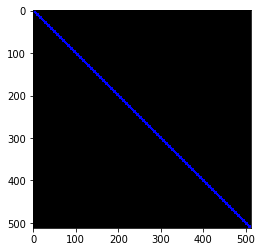

In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#创建一个黑色图
img=np.zeros((512,512,3),dtype=np.uint8)

#画一条线宽为蓝色的直线，参数2为起点，参数3为终点
cv2.line(img,(0,0),(512,512),(255,0,0),5)

plt.imshow(img[:,:,::-1])

### 画矩形
画矩形需要矩形的左上角和右下角的坐标。

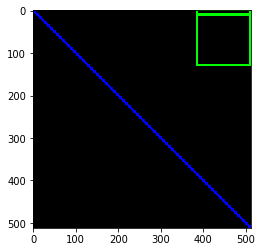

In [5]:
# 画一个线宽为3绿色的矩形
cv2.rectangle(img,(384,10),(510,128),(0,255,0),3)
plt.imshow(img[:,:,::-1])

### 画圆
要指定圆心和半径。

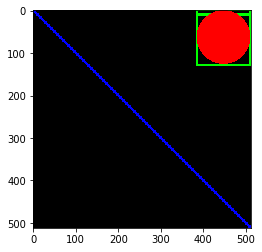

In [6]:
#画一个圆心为(447,63)，半径为63，使用红色填充的圆
cv2.circle(img,(447,63),63,(0,0,255),-1)
plt.imshow(img[:,:,::-1])

### 画椭圆
参数：
```
参数2：椭圆中心
参数3：x/y的长度
参数4：angle-椭圆的旋转角度
参数5：startAngle-椭圆的起始角度
参数6：endAngle-椭圆的结束角
```
这里的角是按照顺时针计算的。

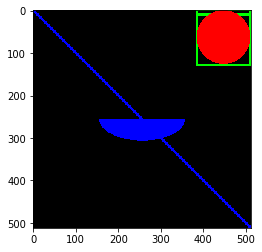

In [8]:
cv2.ellipse(img,(256,256),(100,50),0,0,180,(255,0,0),-1)
plt.imshow(img[:,:,::-1])

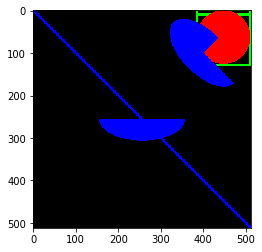

In [9]:
cv2.ellipse(img,(400,100),(100,50),45,0,270,(255,0,0),-1)
plt.imshow(img[:,:,::-1])

### 画多边形

画多边形需要指定一系列多边形的顶点坐标，相当于从第一个点到第二个点画直线，再从第二个点到第三个点画直线….

OpenCV中需要先将多边形的顶点坐标需要变成顶点数×1×2维的矩阵，再来绘制：

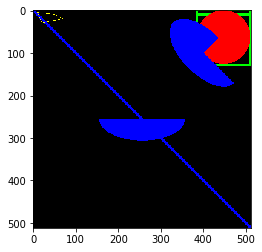

In [12]:
# 定义四个顶点
pst=np.array([[10,5],[50,10],[70,20],[20,30]],np.int32)

pts=pst.reshape((-1,1,2))
cv2.polylines(img,[pts],True,(0,255,255))
plt.imshow(img[:,:,::-1])

参数3为False时，则不会闭合。

如果需要绘制多条直线，使用cv2.polylines()要比cv2.line()高效很多，例如：

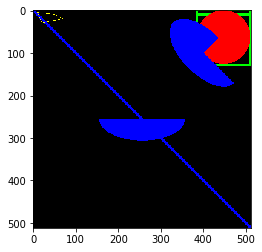

In [13]:
line1 = np.array([[100, 20],  [300, 20]], np.int32).reshape((-1, 1, 2))
line2 = np.array([[100, 60],  [300, 60]], np.int32).reshape((-1, 1, 2))
line3 = np.array([[100, 100],  [300, 100]], np.int32).reshape((-1, 1, 2))
cv2.polylines(img, [line1, line2, line3], True, (0, 255, 255))
plt.imshow(img[:,:,::-1])

### 添加文字
使用cv2.putText()添加文字，它的参数也比较多，同样请对照后面的代码理解这几个参数：
```
参数2：添加的文字
参数3：文字的起始坐标
参数4：字体
参数5：文字的大小（缩放比例）
```

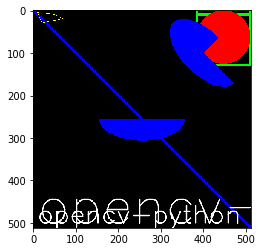

In [15]:
font=cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'opencv-python',(10,500),font,2,(255,255,255),2,lineType=cv2.LINE_AA)
plt.imshow(img[:,:,::-1])

这里有个线型lineType参数，LINE_AA表示抗锯齿线型，具体可见LineTypes

## 练习
* 你能用已学的绘图功能画出OpenCV的logo吗？(提示：椭圆和圆)

![](http://jupter-oss.oss-cn-hangzhou.aliyuncs.com/public/files/image/1095279207225/1547088002912_NRZFkHoIkO.jpg)

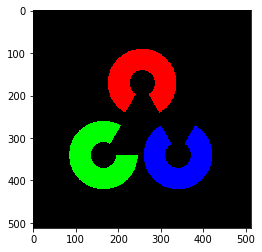

In [28]:
img=np.zeros((512,512,3),dtype=np.uint8)
cv2.ellipse(img,(256,171),(80,80),0,120,420,(0,0,255),-1)
cv2.ellipse(img,(165,340),(80,80),0,0,300,(0,255,0),-1)
cv2.ellipse(img,(340,340),(80,80),0,-60,240,(255,0,0),-1)
cv2.circle(img,(256,171),30,(0,0,0),-1)
cv2.circle(img,(165,340),30,(0,0,0),-1)
cv2.circle(img,(340,340),30,(0,0,0),-1)
plt.imshow(img[:,:,::-1])